# Hyperparameter tuning round 1

The idea of this notebook is to conduct a simple round of hyperparameter tuning on the way to finding the best architecture for training a competent agent to play snake. 

I want to establish 
1. Which model will work best, consider a few options and both a shallow and deeper model.
2. If the learning / exploration schedule can be used to effecitvely speed up training.

## Models to consider
I will consider the following models to start with. 

1. DQN
2. PPO
3. A2C
4. HER

I'll look at training a model on each of these and comparing performance in two settings one where the stadard architecture is being used and one where a slightly deeper and wider one is used.

In [8]:
from snake.environment.game_environment import (
    SnakeEnvLineReset
)
from evaluation.evaluation import get_performance, produce_plots
from callbacks.callbacks import ScoreLoggerCallback   
from snake.visualisation.state_visualisation import visualise_game_state

In [34]:
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.vec_env import SubprocVecEnv
import time

In [31]:

def make_env():
    return SnakeEnvLineReset()


In [47]:
env = SnakeEnvLineReset()

In [35]:
num_envs = 2 # number of cores
env = SubprocVecEnv([make_env for _ in range(num_envs)])


model_a2c = A2C(policy="MlpPolicy", env=env) 


start_time = time.time()
score_logger = ScoreLoggerCallback()
model_a2c.learn(total_timesteps=10000)
a2c_metrics = score_logger.get_metrics()
print(f"Training took {time.time() - start_time} seconds")

Training took 30.980443000793457 seconds


In [18]:
start_time = time.time()

env = SnakeEnvLineReset()
model_dqn = DQN(policy="MlpPolicy", env=env)

score_logger = ScoreLoggerCallback()
model_dqn.learn(total_timesteps=500000, log_interval=4, callback=score_logger)
dqn_metrics = score_logger.get_metrics()

print(f"Training took {time.time() - start_time} sceonds to complete")

Training took 2277.697580099106 sceonds to complete


In [49]:
start_time = time.time()

env = SnakeEnvLineReset()
model_ppo = PPO(policy="MlpPolicy", env=env)

score_logger = ScoreLoggerCallback()
model_ppo.learn(total_timesteps=500000, log_interval=4, callback=score_logger)
ppo_metrics = score_logger.get_metrics()

print(f"Training took {time.time() - start_time} sceonds to complete")

Training took 1506.4285879135132 sceonds to complete


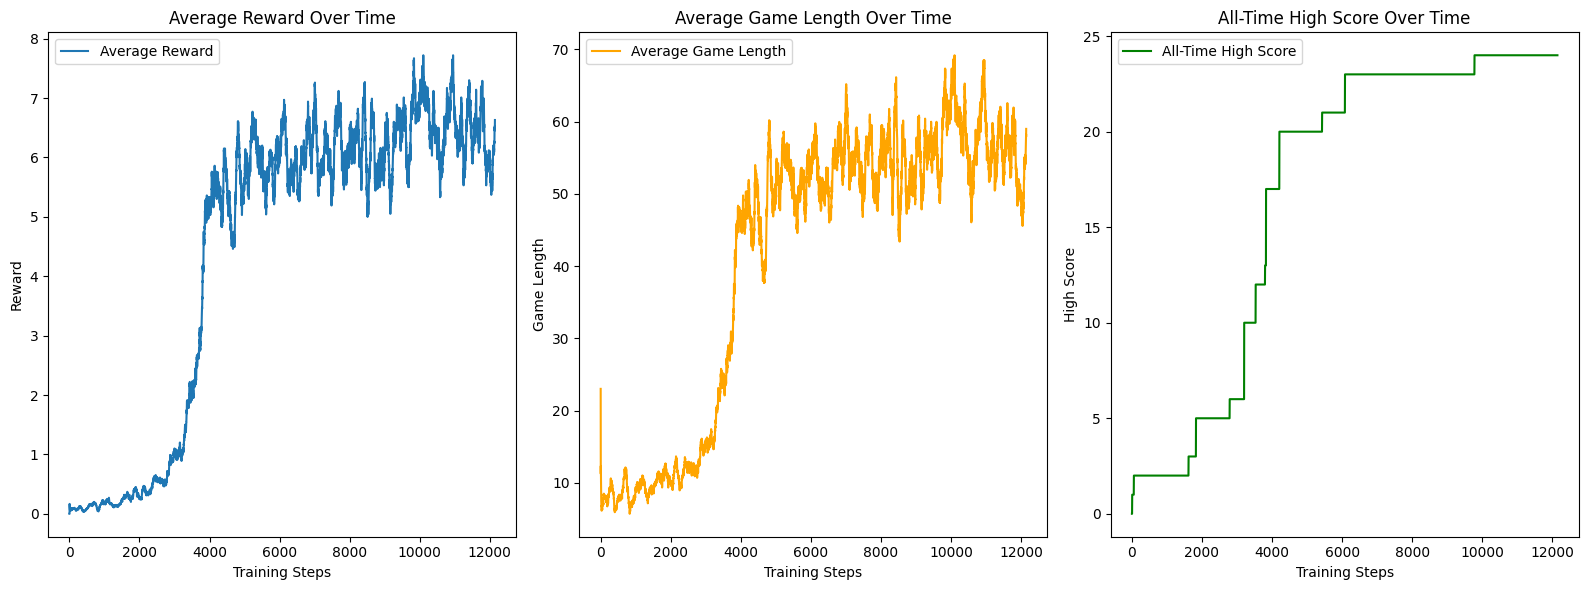

In [38]:
produce_plots(a2c_metrics)

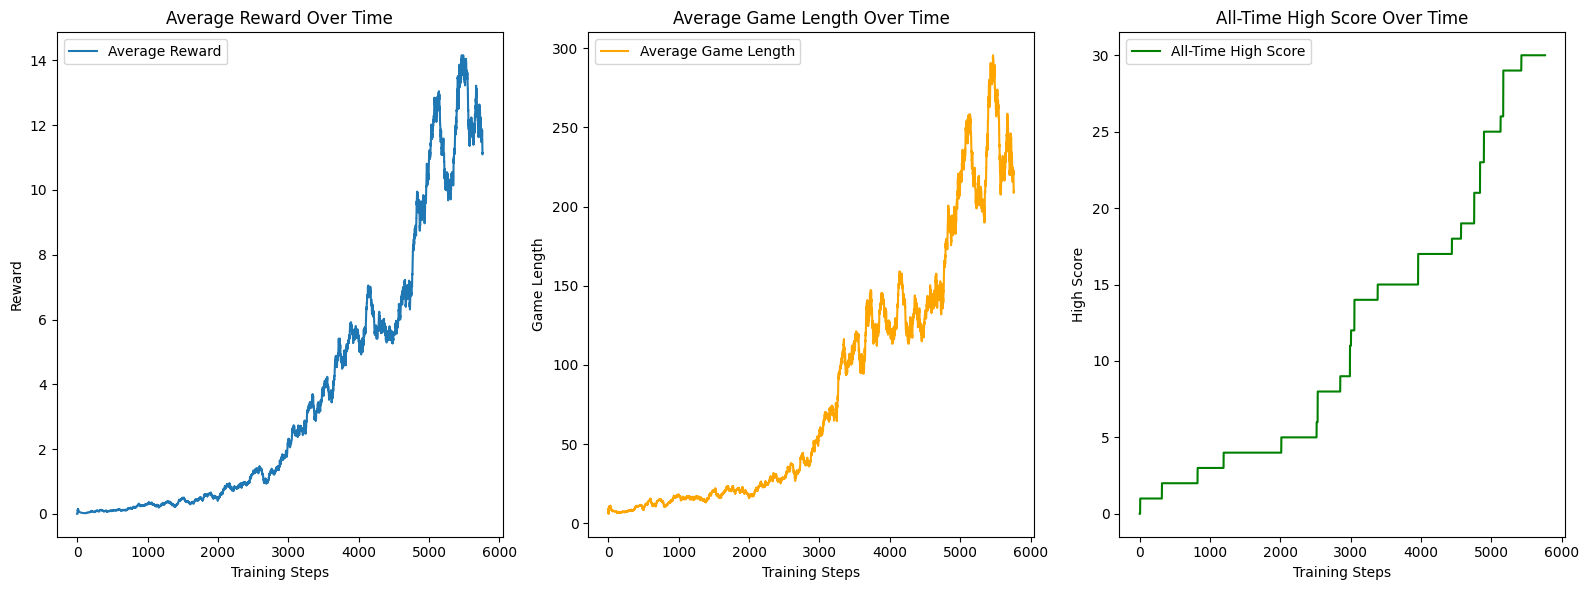

In [50]:
produce_plots(ppo_metrics)

In [45]:
df.to_csv(os.path.join(os.getcwd(), "../data/dqn_shallow_500000.csv"))

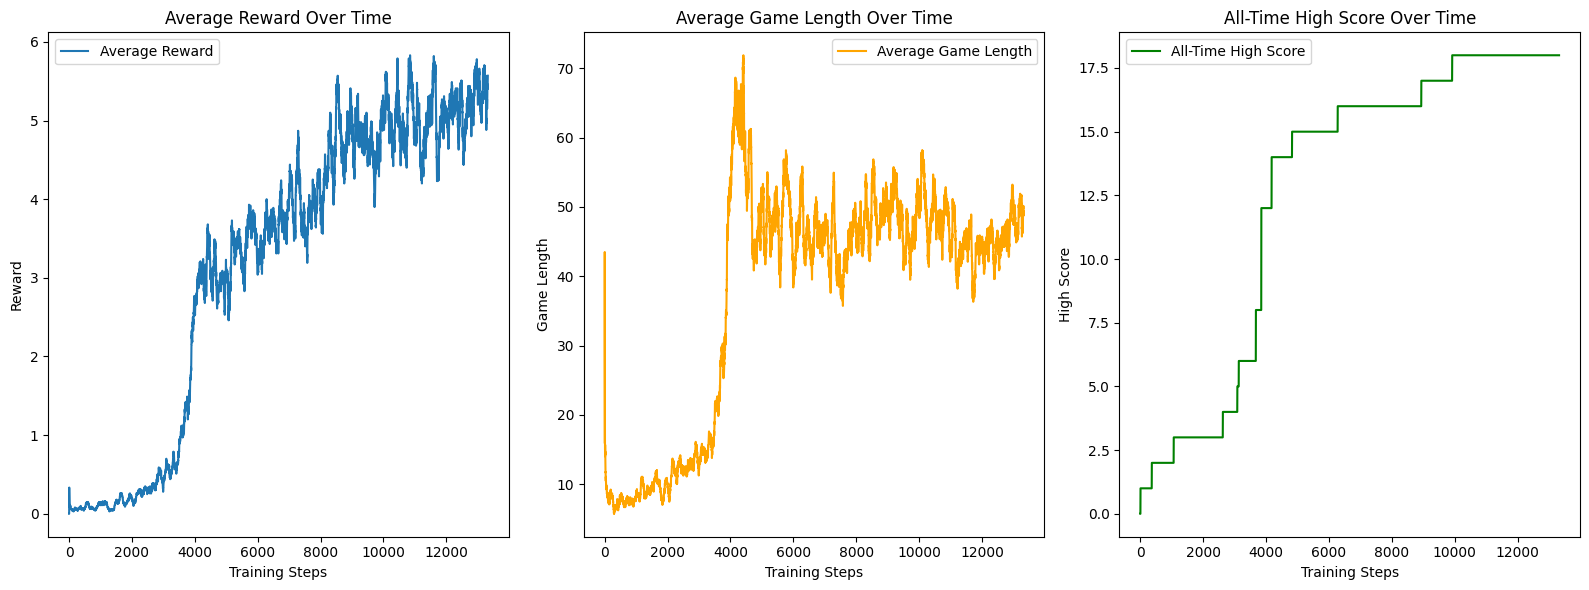

In [19]:
produce_plots(dqn_metrics)

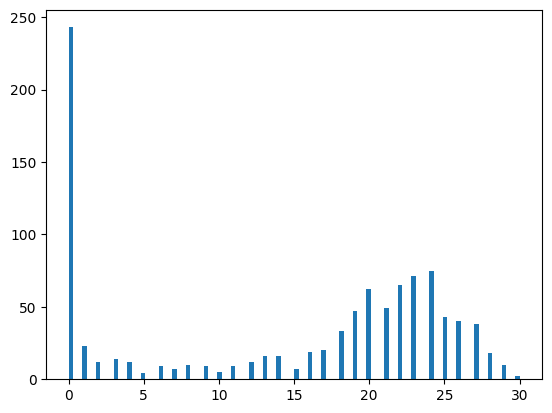

In [58]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(ppo_scores, bins = 100)

plt.show()

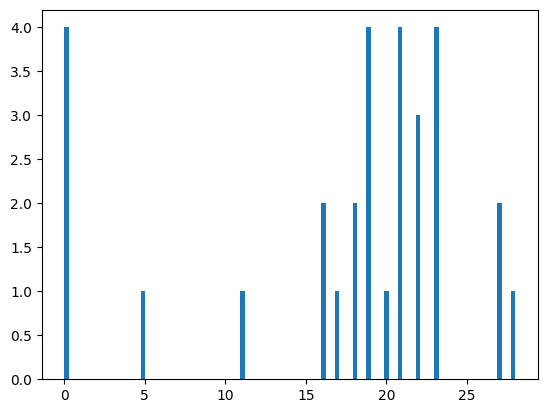

In [14]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(ppo_scores, bins = 100)

plt.show()

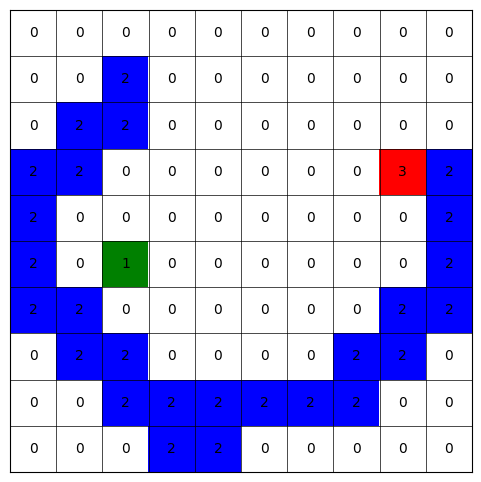

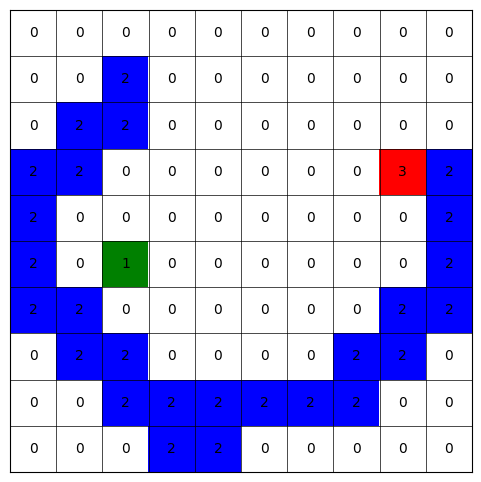

In [49]:
# Simulate 100 steps in the environment with rendering
env = SnakeEnvLineReset()

obs, _ = env.reset()  # Reset the environment and get the initial observation
for step in range(1000):
    # Use the model to predict the next action
    try:
        action, _states = model_ppo.predict(obs, deterministic=True)
    except Exception as e:
        print("STATE IS ", obs)
        visualize_game_state(obs)
        raise e
    # Take the action in the environment
    obs, reward, done, truncated, info = env.step(action)
    if env._time_since_food_eaten > 20*len(env._snake):
        truncated = True
    
    if done or truncated:
        obs, _ = env.reset()
    
    # Render the environment
    env.render()
    
